In [3]:
import numpy as np
import tensorflow as tf

import time
import os
import cPickle
import argparse

from utils import *
from model import Model
import random

import svgwrite
from IPython.display import SVG, display

def in_ipython():
  try:
    __IPYTHON__
  except NameError:
    return False
  else:
    return True


change the fields below to customize how sketch-rnn runs, including running on other training data

In [4]:
filename='output3'
# filename of .svg file to output, without .svg

sample_length=600
# number of strokes to sample

picture_size=160
# a centered svg will be generated of this size

scale_factor=1
# factor to scale down by for svg output.  smaller means bigger output

num_picture=10
# number of pictures to generate

num_col=5
# if num_picture > 1, how many pictures per row?

dataset_name="kanji"
# name of directory containing training data (a folder full of svg's)

color_mode=1
# set to 0 if you are a black and white sort of person...

stroke_width=2.0
# thickness of pen lines

temperature=0.1
# sampling temperature

In [5]:
with open(os.path.join('save', dataset_name, 'config.pkl')) as f: # future
  saved_args = cPickle.load(f)

model = Model(saved_args, True)
sess = tf.InteractiveSession()
saver = tf.train.Saver(tf.all_variables())

ckpt = tf.train.get_checkpoint_state(os.path.join('save', dataset_name))
print ("loading model: ",ckpt.model_checkpoint_path)

saver.restore(sess, ckpt.model_checkpoint_path)

('loading model: ', u'save/kanji/model.ckpt-0')


('.',)
(1, '/', 10)
('.',)
(2, '/', 10)
('.',)
(3, '/', 10)
('.',)
(4, '/', 10)
('.',)
('.',)
('.',)
('.',)
('.',)
('.',)
('.',)
(5, '/', 10)
('.',)
('.',)
(6, '/', 10)
('.',)
('.',)
('.',)
(7, '/', 10)
('.',)
(8, '/', 10)
('.',)
(9, '/', 10)
('.',)
('.',)
(10, '/', 10)


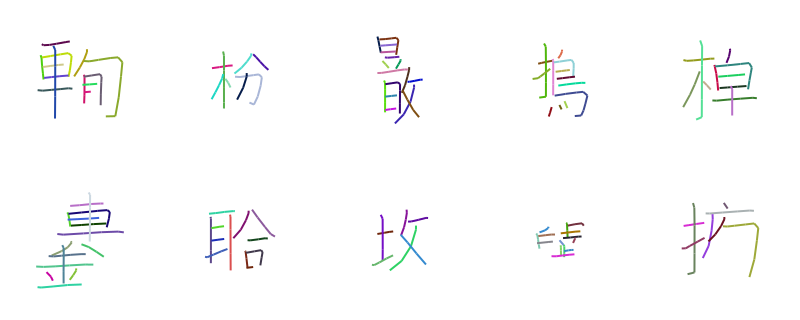

In [6]:
def draw_sketch_array(strokes_array, svg_only = False):
  draw_stroke_color_array(strokes_array, factor=scale_factor, maxcol = num_col, svg_filename = filename+'.svg', stroke_width = stroke_width, block_size = picture_size, svg_only = svg_only, color_mode = color_mode)

def sample_sketches(min_size_ratio = 0.0, max_size_ratio = 0.8, min_num_stroke = 4, max_num_stroke=22, svg_only = True):
  N = num_picture
  frame_size = float(picture_size)
  max_size = frame_size * max_size_ratio
  min_size = frame_size * min_size_ratio
  count = 0
  sketch_list = []
  param_list = []

  temp_mixture = temperature
  temp_pen = temperature

  while count < N:
    #print "attempting to generate picture #", count
    print ('.',)
    [strokes, params] = model.sample(sess, sample_length, temp_mixture, temp_pen, stop_if_eoc = True)
    [sx, sy, num_stroke, num_char, _] = strokes.sum(0)
    if num_stroke < min_num_stroke or num_char == 0 or num_stroke > max_num_stroke:
      #print "num_stroke ", num_stroke, " num_char ", num_char
      continue
    [sx, sy, sizex, sizey] = calculate_start_point(strokes)
    if sizex > max_size or sizey > max_size:
      #print "sizex ", sizex, " sizey ", sizey
      continue
    if sizex < min_size or sizey < min_size:
      #print "sizex ", sizex, " sizey ", sizey
      continue
    # success
    print (count+1,"/",N)
    count += 1
    sketch_list.append(strokes)
    param_list.append(params)
  # draw the pics
  draw_sketch_array(sketch_list, svg_only = svg_only)
  return sketch_list, param_list

if __name__ == '__main__':
  ipython_mode = in_ipython()
  [strokes, params] = sample_sketches(svg_only = not ipython_mode)
